# Example to reduce file size in case of memory errors (using pyaerocom)

In [15]:
import pyaerocom as pya
pya.__version__

'0.8.1.dev4'

**NOTE: YOU NEED PYAEROCOM v0.8.1.dev4 or larger for this**

In [16]:
pya.const.BASEDIR = '/home/notebook/shared-ns1000k/inputs/pyaerocom-testdata/'

Initiating directories for pyaerocom test dataset


In [17]:
pya.browse_database('*SPRIN*')


Pyaerocom ReadGridded
---------------------
Data ID: MIROC-SPRINTARS_AP3-CTRL
Data directory: /home/notebook/shared-ns1000k/inputs/pyaerocom-testdata/modeldata/MIROC-SPRINTARS_AP3-CTRL/renamed
Available experiments: ['AP3-CTRL']
Available years: [1850, 2010]
Available frequencies ['daily' 'monthly' '3hourly']
Available variables: ['abs440aer', 'abs550aer', 'abs870aer', 'ac550aer', 'acs550aer', 'airmass', 'airmass3d', 'albsrfc', 'bldep', 'bldepmax', 'bldepmin', 'bs550aer', 'cdnc', 'cheaqpso4', 'chegpso4', 'chepsoa', 'cldncl', 'cli', 'clivi', 'clt', 'clt3d', 'clw', 'convclt', 'dh', 'dms', 'dry550aer', 'drydust', 'dryoa', 'dryso2', 'dryso4', 'dryss', 'dtau', 'dtauc', 'dtaus', 'ec550aer', 'ec550dust', 'ecs550aer', 'eis', 'emibc', 'emidms', 'emidust', 'emioa', 'emiso2', 'emiss', 'evspsbl', 'hfls', 'hfss', 'hus', 'isop', 'lai', 'loadbc', 'loaddms', 'loaddust', 'loadoa', 'loadso2', 'loadso4', 'loadss', 'lts', 'lwp', 'mmraerh2o', 'mmrbc', 'mmrdust', 'mmroa', 'mmrpm10', 'mmrpm2p5', 'mmrso4', '

In [18]:
data = pya.io.ReadGridded('MIROC-SPRINTARS_AP3-CTRL').read_var('mmrso4', ts_type='3hourly')

### Extract surface level and crop summer months and arctic region

In [7]:
data_surf = data.extract_surface_level()

In [10]:
data_surf_cropped = data_surf.crop(time_range=(4, 8), lat_range=(66, 90))
data_surf_cropped

pyaerocom.GriddedData
Grid data: <iris 'Cube' of mass_fraction_of_sulfate_dry_aerosol_particles_in_air / (kg kg-1) (time: 4; latitude: 43; longitude: 640)>

### Save to NetCDF

In [11]:
data_surf_cropped.to_netcdf('.', 'SPRINTARS_extract.nc')

'./SPRINTARS_extract.nc'

### Reload the subset that was just saved

In [13]:
reloaded_subset = pya.GriddedData('SPRINTARS_extract.nc')
reloaded_subset

pyaerocom.GriddedData
Grid data: <iris 'Cube' of mass_fraction_of_sulfate_dry_aerosol_particles_in_air / (kg kg-1) (time: 4; latitude: 43; longitude: 640)>

/opt/conda/lib/python3.7/site-packages/iris/analysis/cartography.py:394: UserWarning: Using DEFAULT_SPHERICAL_EARTH_RADIUS.
  warnings.warn("Using DEFAULT_SPHERICAL_EARTH_RADIUS.")
/opt/conda/lib/python3.7/site-packages/iris/coords.py:1353: UserWarning: Collapsing a multi-dimensional coordinate. Metadata may not be fully descriptive for 'surface_air_pressure'.
  warnings.warn(msg.format(self.name()))


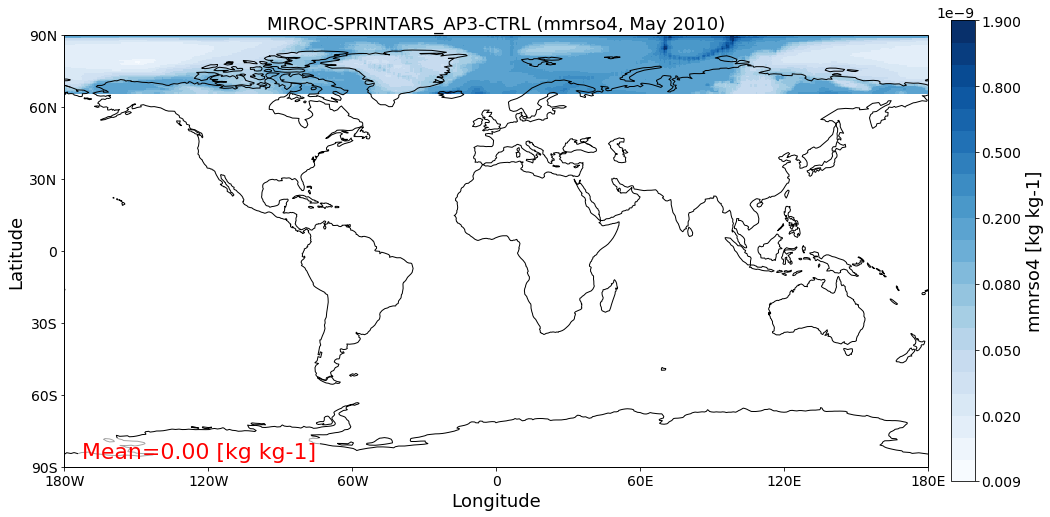

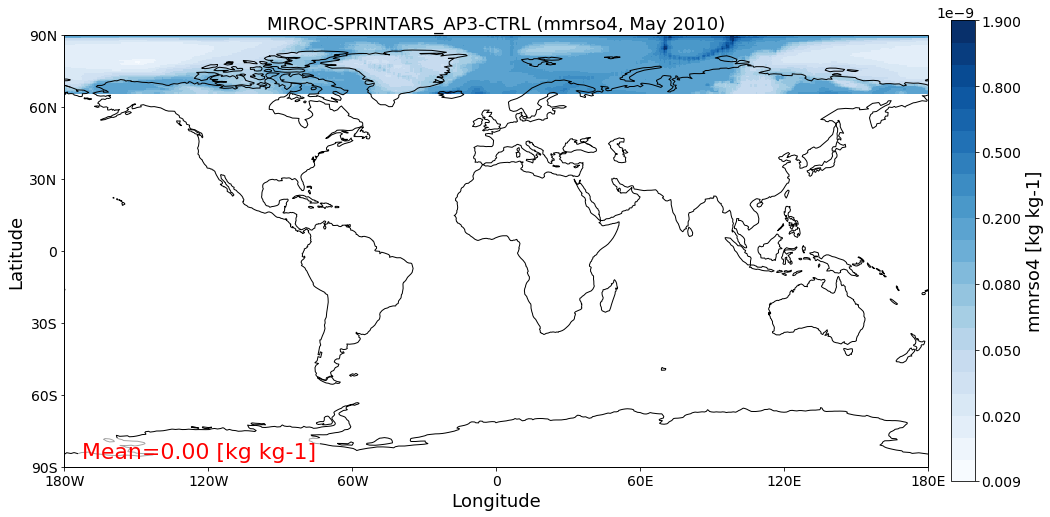

In [14]:
reloaded_subset.quickplot_map()